In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
import os
%matplotlib inline
from PIL import Image
import cv2

In [3]:
os.getcwd()

'C:\\Users\\peddi\\DL files'

In [4]:
os.chdir('D:\Data science\Face recognition web app with ML in flask\Module-2')

In [8]:
ls model

 Volume in drive D is DATA
 Volume Serial Number is DCD9-BF98

 Directory of D:\Data science\Face recognition web app with ML in flask\Module-2\model

05-11-2020  23:55    <DIR>          .
05-11-2020  23:55    <DIR>          ..
05-11-2020  17:38       436,604,162 data1_10000_norm.npz
05-11-2020  17:43         2,265,900 data2_pca_50_y_mean.pickle.npz
05-11-2020  17:38        54,756,637 df_images_100_100.pickle
01-11-2020  12:25           930,127 haarcascade_frontalface_default.xml
01-11-2020  12:25            80,159 mean_preprocess.pickle
01-11-2020  12:25         1,039,965 model_svm.pickle
05-11-2020  23:55           966,141 model1_svm.pickle
01-11-2020  12:25         4,082,021 pca_50.pickle
05-11-2020  17:42         4,082,044 pca1_50.pickle
               9 File(s)    504,807,156 bytes
               2 Dir(s)  979,874,897,920 bytes free


In [12]:
#load all the models
haar=cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')
#pickle files
mean=pickle.load(open('./model/mean_preprocess.pickle','rb'))
model_svm=pickle.load(open('./model/model1_svm.pickle','rb'))
model_pca=pickle.load(open('./model/pca1_50.pickle','rb'))
print('Model loaded successfully')

Model loaded successfully


In [29]:
gender_pre=['Female','Male']
font=cv2.FONT_HERSHEY_SIMPLEX

In [66]:
#test data
test_data_path='./data/video.mp4'
color='bgr'
# step-1: read image
img=cv2.imread(test_data_path)
def pipeline_model(img,color='rgb'):
    #step-2 convert to gray scale
    if color =='bgr':
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #step-3 crop the face(using haar cascade classifier)
    faces=haar.detectMultiScale(gray,1.5,3)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2) #drawing rectangle
        roi=gray[y:y+h,x:x+w] #crop the image
        #step-4 normalization [0-1]
        roi=roi/255.0
        #step-5 resize images[100,100]
        if roi.shape[1]>100:
            roi_resize=cv2.resize(roi,(100,100),cv2.INTER_AREA)
        else:
            roi_resize=cv2.resize(roi,(100,100),cv2.INTER_CUBIC)
        #step-6 Flattening (1,10000)
        roi_reshape=roi_resize.reshape(1,10000) #1,-1
        #step-7 Subtract with mean
        roi_mean=roi_reshape-mean
        #step-8 get eigen image
        eigen_image=model_pca.transform(roi_mean)
        #step-9 pass to ml model(svm)
        results=model_svm.predict_proba(eigen_image)[0]
        # step-10 
        predict=results.argmax() #0 and 1
        score=results[predict]
        # step 11
        text="%s: %0.2f"%(gender_pre[predict],score)
        cv2.putText(img,text,(x,y),font,1,(0,255,0),2)
        return img
#cv2.imshow('Gender Prediction',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [21]:
text

'Female: 0.88'

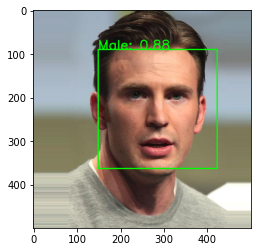

In [59]:
#test data
test_data_path='./data/male_000281.jpg'
color='bgr'
# step-1: read image
img=Image.open(test_data_path)  #rgb
#step-2 : convert into array
img=np.array(img)
#step-3 pass to pipeline model
img=pipeline_model(img)
plt.imshow(img)

### Apply pipeline to video

In [73]:
cap=cv2.VideoCapture('./data/video.mp4')
while True:
    ret,frame=cap.read()  #bgr
    if ret==False:
        break
    #frame=pipeline_model(frame,color='bgr')
    cv2.imshow('Gender Detector',frame)
    if cv2.waitKey(10)==27:   #==ord('s'):#->press s key to exit  #27: #press esc key to exit
        break
cv2.destroyAllWindows()
cap.release()

In [74]:
cap=cv2.VideoCapture('./data/video.mp4')
while True:
    ret,frame=cap.read()  #bgr
    if ret==False:
        break
    frame=pipeline_model(frame,color='bgr')
    cv2.imshow('Gender Detector',frame)
    if cv2.waitKey(10)==27:   #==ord('s'):#->press s key to exit  #27: #press esc key to exit
        break
cv2.destroyAllWindows()
cap.release()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-hfoi92lm\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [2]:
import flask